# ZOMATO API - II Solutions

##### Q2.)User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

##### 2.1.)Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

##### 2.1.1.)Number of Votes given Restaurant

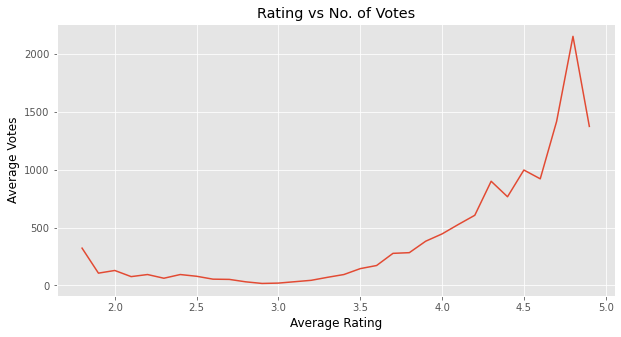

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('zomato.csv' , encoding = 'latin-1')

data = data[data["Country Code"] == 1]

data = data[data["Rating text"] != "Not rated"]

ratings = np.array(data["Aggregate rating"])
votes = np.array(data["Votes"])

votes_to_rating_count = {}

for i in range(len(ratings)) :
    if ratings[i] not in votes_to_rating_count :
        votes_to_rating_count[ratings[i]] = [votes[i] , 1]
    else:
        votes_to_rating_count[ratings[i]][0] += votes[i]
        votes_to_rating_count[ratings[i]][1] += 1

votes_to_rating = []            
for key,value in votes_to_rating_count.items() :      
    avg_votes = value[0]//value[1]
    votes_to_rating.append([key , avg_votes])

votes_to_rating.sort()  


rating = [i[0] for i in votes_to_rating ]
votes = [i[1] for i in votes_to_rating ]

plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(rating , votes)
plt.xlabel('Average Rating' , color = 'k')
plt.ylabel('Average Votes' , color = 'k')
plt.title('Rating vs No. of Votes')
plt.show()

##### 2.1.2.)Restaurant serving more number of cuisines

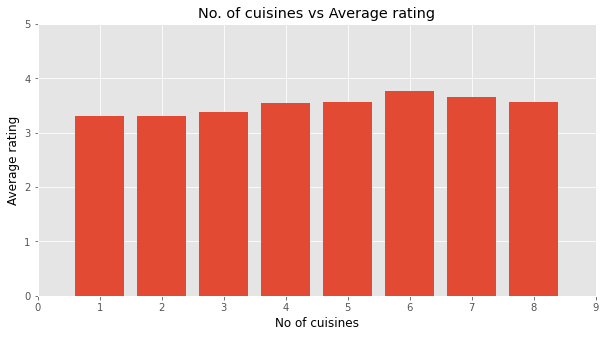

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('zomato.csv' , encoding = 'latin-1')
data = data[data["Country Code"] == 1]

data = data[data["Rating text"] != "Not rated"]


ratings = np.array(data["Aggregate rating"])
cuisines = np.array(data["Cuisines"])

cuisine_with_rating = {}

for i in range(len(ratings)) :
    no_of_cuisines = len(cuisines[i].split(", "))
    
    if no_of_cuisines not in cuisine_with_rating :
        cuisine_with_rating[no_of_cuisines] = [ratings[i] , 1]
    else :
        cuisine_with_rating[no_of_cuisines][0]+=ratings[i]
        cuisine_with_rating[no_of_cuisines][1]+=1
        
        
cuisine_with_avg_rating = []

for key,value in cuisine_with_rating.items() :
    total_rating = value[0]
    no_of_res = value[1]
    avg = round(total_rating/no_of_res,2)

    cuisine_with_avg_rating.append([key , avg])
    
cuisine_with_avg_rating.sort()


cuisine_count = [i[0] for i in cuisine_with_avg_rating]
avg_rating = [i[1] for i in cuisine_with_avg_rating]

plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.axis([0,9,0,5])
plt.bar(cuisine_count,avg_rating)
plt.xlabel('No of cuisines' , color = 'k')
plt.ylabel('Average rating' , color = 'k')
plt.title('No. of cuisines vs Average rating')
plt.show()

##### 2.1.3

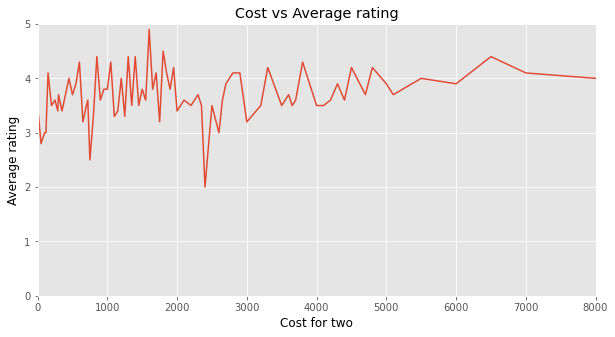

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('zomato.csv' , encoding = 'latin-1')

data = data[data["Country Code"] == 1]

data = data[data["Rating text"] != "Not rated"]

ratings = np.array(data["Aggregate rating"])
cost_for_two = np.array(data["Average Cost for two"])

rating_and_cost = {}

for i in range(len(ratings)) : 
    if ratings[i] not in rating_and_cost :
        rating_and_cost[cost_for_two[i]] = [ratings[i] , 1]
    else :
        rating_and_cost[cost_for_two[i]][0] += ratings[i]
        rating_and_cost[cost_for_two[i]][1] += 1

cost_with_rating = []        
        
for key , value in rating_and_cost.items() :
    avg = round(value[0]/value[1] , 1)
    
    cost_with_rating.append([key , avg])
    
cost_with_rating.sort()

cost_for_two = [i[0] for i in cost_with_rating] 
avg_rating = [i[1] for i in cost_with_rating] 

plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.axis([0,8000,0,5])
plt.plot(cost_for_two , avg_rating)
plt.xlabel("Cost for two" , color = 'k')
plt.ylabel("Average rating" , color = 'k')
plt.title("Cost vs Average rating")
plt.show()

##### 2.1.4

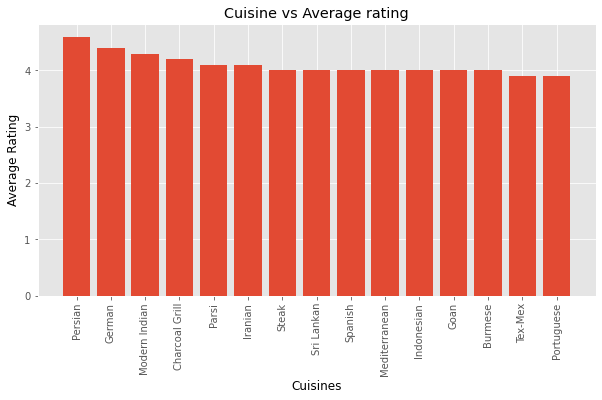

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('zomato.csv' , encoding = 'latin-1')

data = data[data["Country Code"] == 1]

data = data[data["Rating text"] != "Not rated"]

ratings = np.array(data["Aggregate rating"])
cuisines = np.array(data["Cuisines"])

cuisines_to_rating_count = {}

for i in range(len(ratings)) :
    cuisine_list = cuisines[i].split(", ")
    for c in cuisine_list :
        if c not in cuisines_to_rating_count :
            cuisines_to_rating_count[c] = [ratings[i] , 1]
        else :
            cuisines_to_rating_count[c][0] += ratings[i]
            cuisines_to_rating_count[c][1] += 1

cuisine_to_rating = []            
for key,value in cuisines_to_rating_count.items() :   
    
    avg = round(value[0]/value[1] , 1)
    cuisine_to_rating.append([avg , key])

cuisine_to_rating.sort(reverse = True)    
    
cuisine = []
rating = []

for i in cuisine_to_rating :
    cuisine.append(i[1])
    rating.append(i[0])

plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.bar(cuisine[:15] , rating[:15] )
plt.xticks(rotation = 90)
plt.xlabel("Cuisines" , color = 'k')
plt.ylabel("Average Rating" , color = 'k')
plt.title('Cuisine vs Average rating')
plt.show()    

##### 2.2

##### 2.2.1

,Locality,Weighted Restaurant Rating
0,"Hotel Clarks Amer, Malviya Nagar",4.90
1,Aminabad,4.90
2,Friends Colony,4.89
3,Powai,4.84
4,Kirlampudi Layout,4.82
5,"Express Avenue Mall, Royapettah",4.80
6,Deccan Gymkhana,4.80
7,Banjara Hills,4.72
8,"Sector 5, Salt Lake",4.71
9,"Riverside Mall, Gomti Nagar",4.70


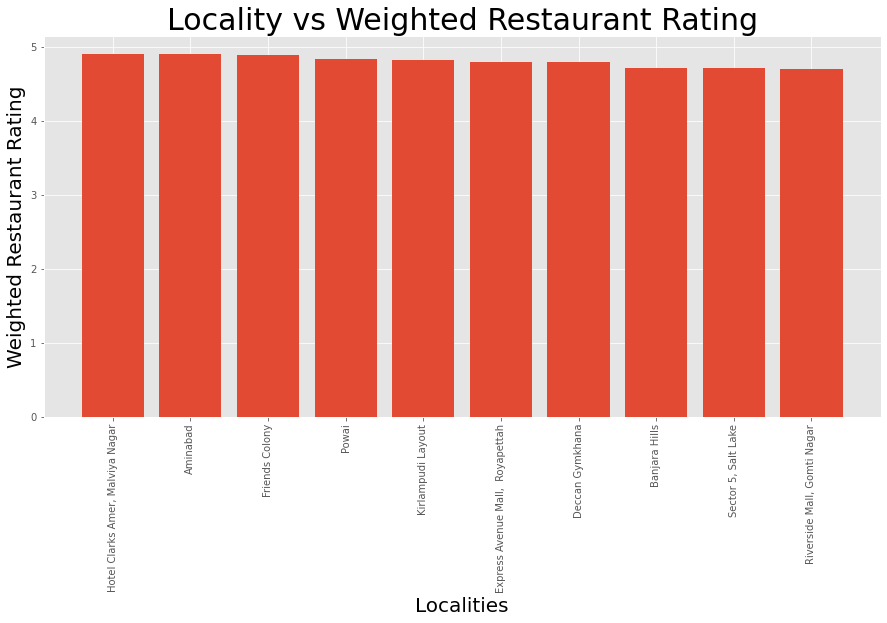

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('zomato.csv' , encoding = 'latin-1')

data = data[data["Country Code"] == 1]

data = data[data["Rating text"] != "Not rated"]

locality_dict = {}

localities = np.array(data['Locality'])
ratings = np.array(data["Aggregate rating"])
votes = np.array(data["Votes"])

for i in range(len(localities)) : 
        if localities[i] not in locality_dict :
            locality_dict[localities[i]] = [votes[i]*ratings[i] , votes[i]] 
        else :
            locality_dict[localities[i]][0] += (votes[i]*ratings[i])
            locality_dict[localities[i]][1] += votes[i]

locality_weighted_rating = []

for key , value in locality_dict.items() :
    weighted_rating = round(value[0]/value[1] , 2)
    
    locality_weighted_rating.append([weighted_rating , key])

locality_weighted_rating.sort(reverse = True)

localities = [i[1] for i in locality_weighted_rating][:10]
rating = [i[0] for i in locality_weighted_rating][:10]

# Priniting the names of Top - 10 localities and their weighted restaurant ratings
df = pd.DataFrame(list(zip(localities , rating )), columns = ['Locality', 'Weighted Restaurant Rating'])
display(df)

# Making the bar graph
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.bar(localities , rating)
plt.xticks(rotation = 90)
plt.xlabel('Localities' , color = 'k' , size = 20)
plt.ylabel('Weighted Restaurant Rating' , color = 'k', size = 20)
plt.title('Locality vs Weighted Restaurant Rating' , size = 30)
plt.show()
    
    
